In [30]:
options(warn = -1)
options(repr.plot.width=15, repr.plot.height=9) 
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

In [31]:
library(stringr)

In [32]:
no <- 1:4
name <- c("Apple", "Banana", "Peach", "Berry")
price <- c(500, 200, 200, 50)
qty <- c(5, 4, 3, 2)

furit <- data.frame(번호 = no, 상품명 = name, 금액 = price, 재고량 = qty)
furit

ls()


번호,상품명,금액,재고량
<int>,<chr>,<dbl>,<dbl>
1,Apple,500,5
2,Banana,200,4
3,Peach,200,3
4,Berry,50,2


[1] "colors"        "furit"         "gdp"           "GDP_ranking"  
 [5] "GDP_ranking15" "GDP_ranking2"  "name"          "no"           
 [9] "price"         "qty"           "red_countries" "seoul"

In [33]:
# 메모리 형태로 파일 보관
save(no, furit, name, file = './Data/testFruit.hwp')

In [34]:
rm(no, furit, name)
ls()

[1] "colors"        "gdp"           "GDP_ranking"   "GDP_ranking15"
[5] "GDP_ranking2"  "price"         "qty"           "red_countries"
[9] "seoul"

In [35]:
load("./Data/testFruit.hwp")
furit

번호,상품명,금액,재고량
<int>,<chr>,<dbl>,<dbl>
1,Apple,500,5
2,Banana,200,4
3,Peach,200,3
4,Berry,50,2


In [36]:
ls()

[1] "colors"        "furit"         "gdp"           "GDP_ranking"  
 [5] "GDP_ranking15" "GDP_ranking2"  "name"          "no"           
 [9] "price"         "qty"           "red_countries" "seoul"

In [37]:
# furit를 csv로 저장하기

write.csv(furit, "./Data/fruit.csv", row.names=F)

In [38]:
read.csv("./Data/fruit.csv")

번호,상품명,금액,재고량
<int>,<chr>,<int>,<int>
1,Apple,500,5
2,Banana,200,4
3,Peach,200,3
4,Berry,50,2


# 세계 GDP 순의 데이터 정제 및 차트 만들기

In [39]:

GDP_ranking <- read.csv("./Data/GDP.csv")
head(GDP_ranking)
tail(GDP_ranking)


GDP_ranking2 <- GDP_ranking[-c(1:4),-c(3,6)]
head(GDP_ranking2)



,X,Gross.domestic.product.2018,X.1,X.2,X.3,X.4
,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>
1,,,NA,,,
2,,,NA,,(millions of,
3,,Ranking,NA,Economy,US dollars),
4,,,NA,,,
5,USA,1,NA,United States,"20,494,100",
6,CHN,2,NA,China,"13,608,152",


,X,Gross.domestic.product.2018,X.1,X.2,X.3,X.4
,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>
323,,,NA,,,
324,,,NA,,,
325,,,NA,,,
326,,,NA,,,
327,,,NA,,,
328,,,NA,,,


,X,Gross.domestic.product.2018,X.2,X.3
,<chr>,<chr>,<chr>,<chr>
5,USA,1,United States,"20,494,100"
6,CHN,2,China,"13,608,152"
7,JPN,3,Japan,"4,970,916"
8,DEU,4,Germany,"3,996,759"
9,GBR,5,United Kingdom,"2,825,208"
10,FRA,6,France,"2,777,535"


In [40]:
# 상위 15개국만 선별한다.

GDP_ranking15 <- head(GDP_ranking2, 15)
GDP_ranking15


,X,Gross.domestic.product.2018,X.2,X.3
,<chr>,<chr>,<chr>,<chr>
5,USA,1,United States,"20,494,100"
6,CHN,2,China,"13,608,152"
7,JPN,3,Japan,"4,970,916"
8,DEU,4,Germany,"3,996,759"
9,GBR,5,United Kingdom,"2,825,208"
10,FRA,6,France,"2,777,535"
11,IND,7,India,"2,726,323"
12,ITA,8,Italy,"2,073,902"
13,BRA,9,Brazil,"1,868,626"


In [41]:
# 컬럼 이름 정의 code, Ranking, Nation, GDP

colnames(GDP_ranking15) <- c("Code", "Ranking","Nation","GDP")


In [42]:
head(GDP_ranking15)

,Code,Ranking,Nation,GDP
,<chr>,<chr>,<chr>,<chr>
5,USA,1,United States,"20,494,100"
6,CHN,2,China,"13,608,152"
7,JPN,3,Japan,"4,970,916"
8,DEU,4,Germany,"3,996,759"
9,GBR,5,United Kingdom,"2,825,208"
10,FRA,6,France,"2,777,535"


In [43]:
# rownames 새로 구성하기

rownames(GDP_ranking15) <- c() # 벡터 초기화

In [44]:
head(GDP_ranking15)

,Code,Ranking,Nation,GDP
,<chr>,<chr>,<chr>,<chr>
1,USA,1,United States,"20,494,100"
2,CHN,2,China,"13,608,152"
3,JPN,3,Japan,"4,970,916"
4,DEU,4,Germany,"3,996,759"
5,GBR,5,United Kingdom,"2,825,208"
6,FRA,6,France,"2,777,535"


In [45]:

gdp <- GDP_ranking15$GDP
gdp

GDP_ranking15$GDP <- as.numeric(str_replace_all(gdp, ",",""))
GDP_ranking15



[1] " 20,494,100 " " 13,608,152 " " 4,970,916 "  " 3,996,759 "  " 2,825,208 " 
 [6] " 2,777,535 "  " 2,726,323 "  " 2,073,902 "  " 1,868,626 "  " 1,712,510 " 
[11] " 1,657,554 "  " 1,619,424 "  " 1,432,195 "  " 1,426,189 "  " 1,223,809 "

Code,Ranking,Nation,GDP
<chr>,<chr>,<chr>,<dbl>
USA,1,United States,20494100
CHN,2,China,13608152
JPN,3,Japan,4970916
DEU,4,Germany,3996759
GBR,5,United Kingdom,2825208
FRA,6,France,2777535
IND,7,India,2726323
ITA,8,Italy,2073902
BRA,9,Brazil,1868626


# 바 그래프 보여주기

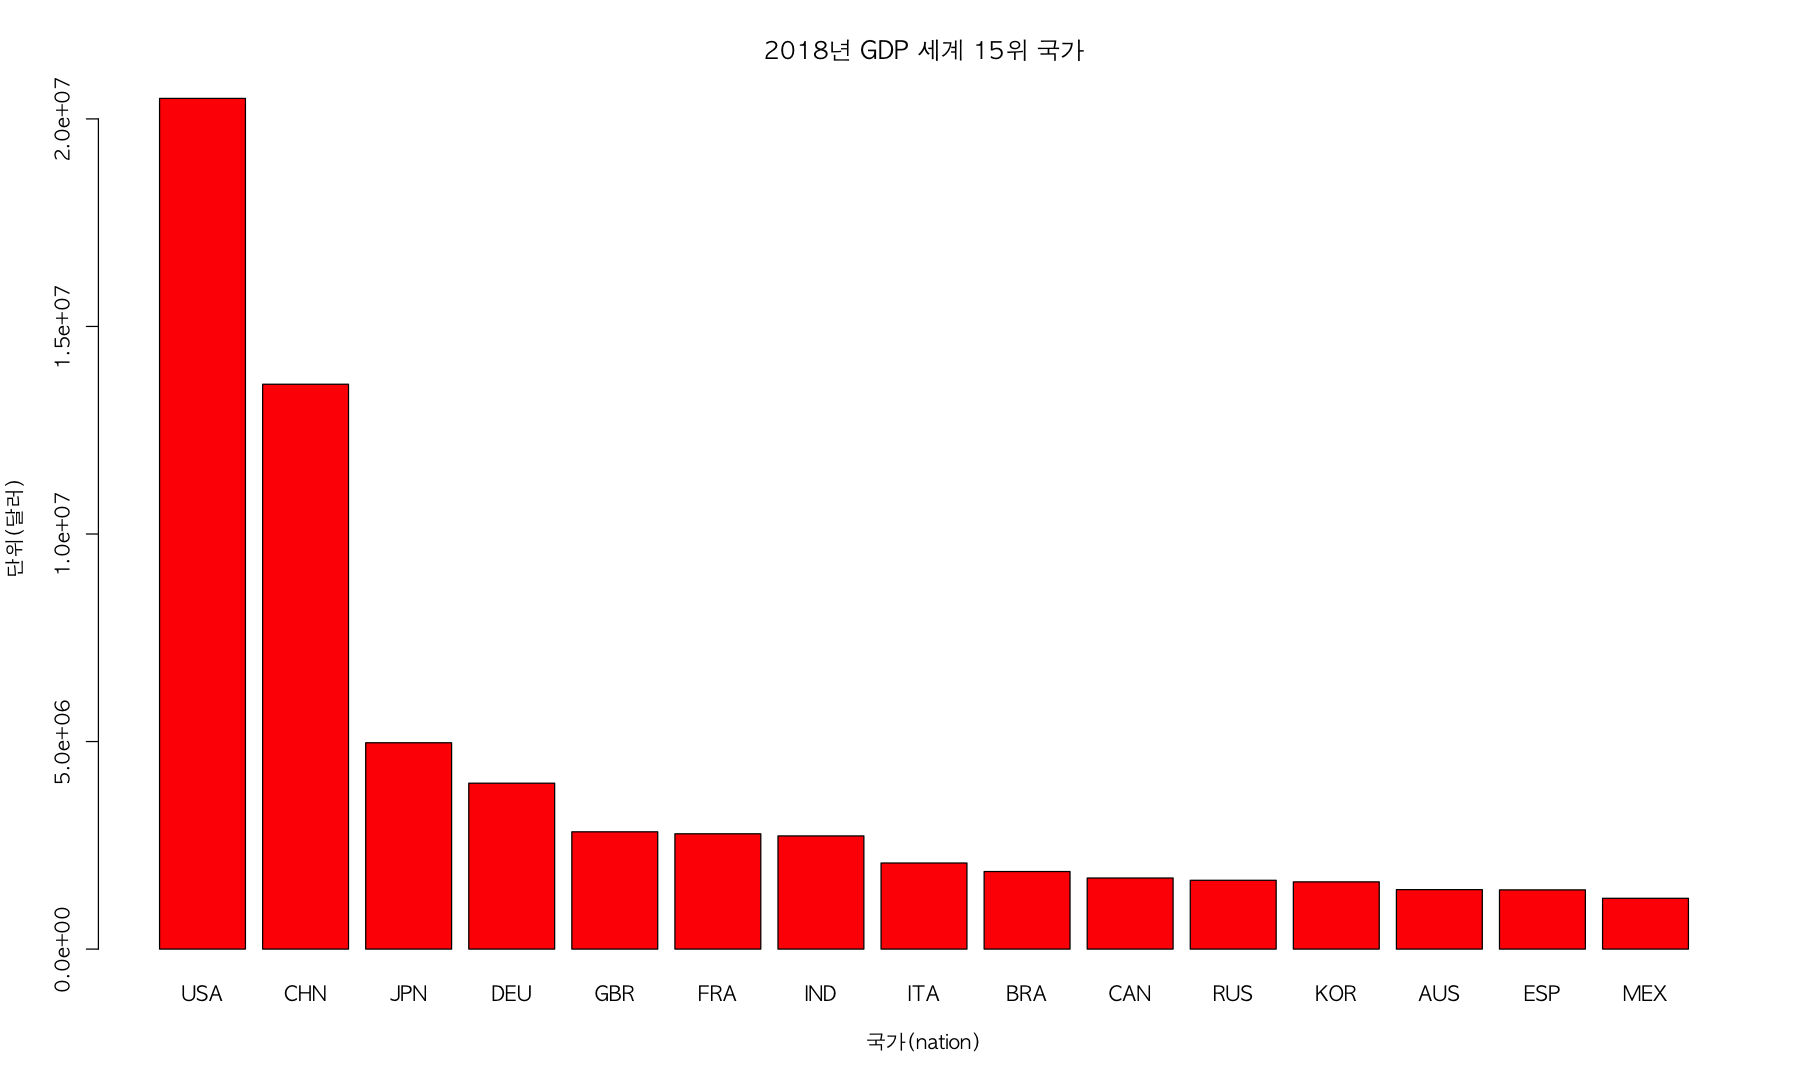

In [46]:
par(family = "AppleGothic", bg = 'white') #한글 나오게 하기 + 백그라운드 컬러 정하기
barplot(
    GDP_ranking15$GDP,               #Data
    main = "2018년 GDP 세계 15위 국가", # main Title
    xlab = "국가(nation)", # x축 이름
    ylab = "단위(달러)",    # y축 이름
    col = c("red"), #바 색칠하기
    name = GDP_ranking15$Code  #벡터의 이름 주기
    
)

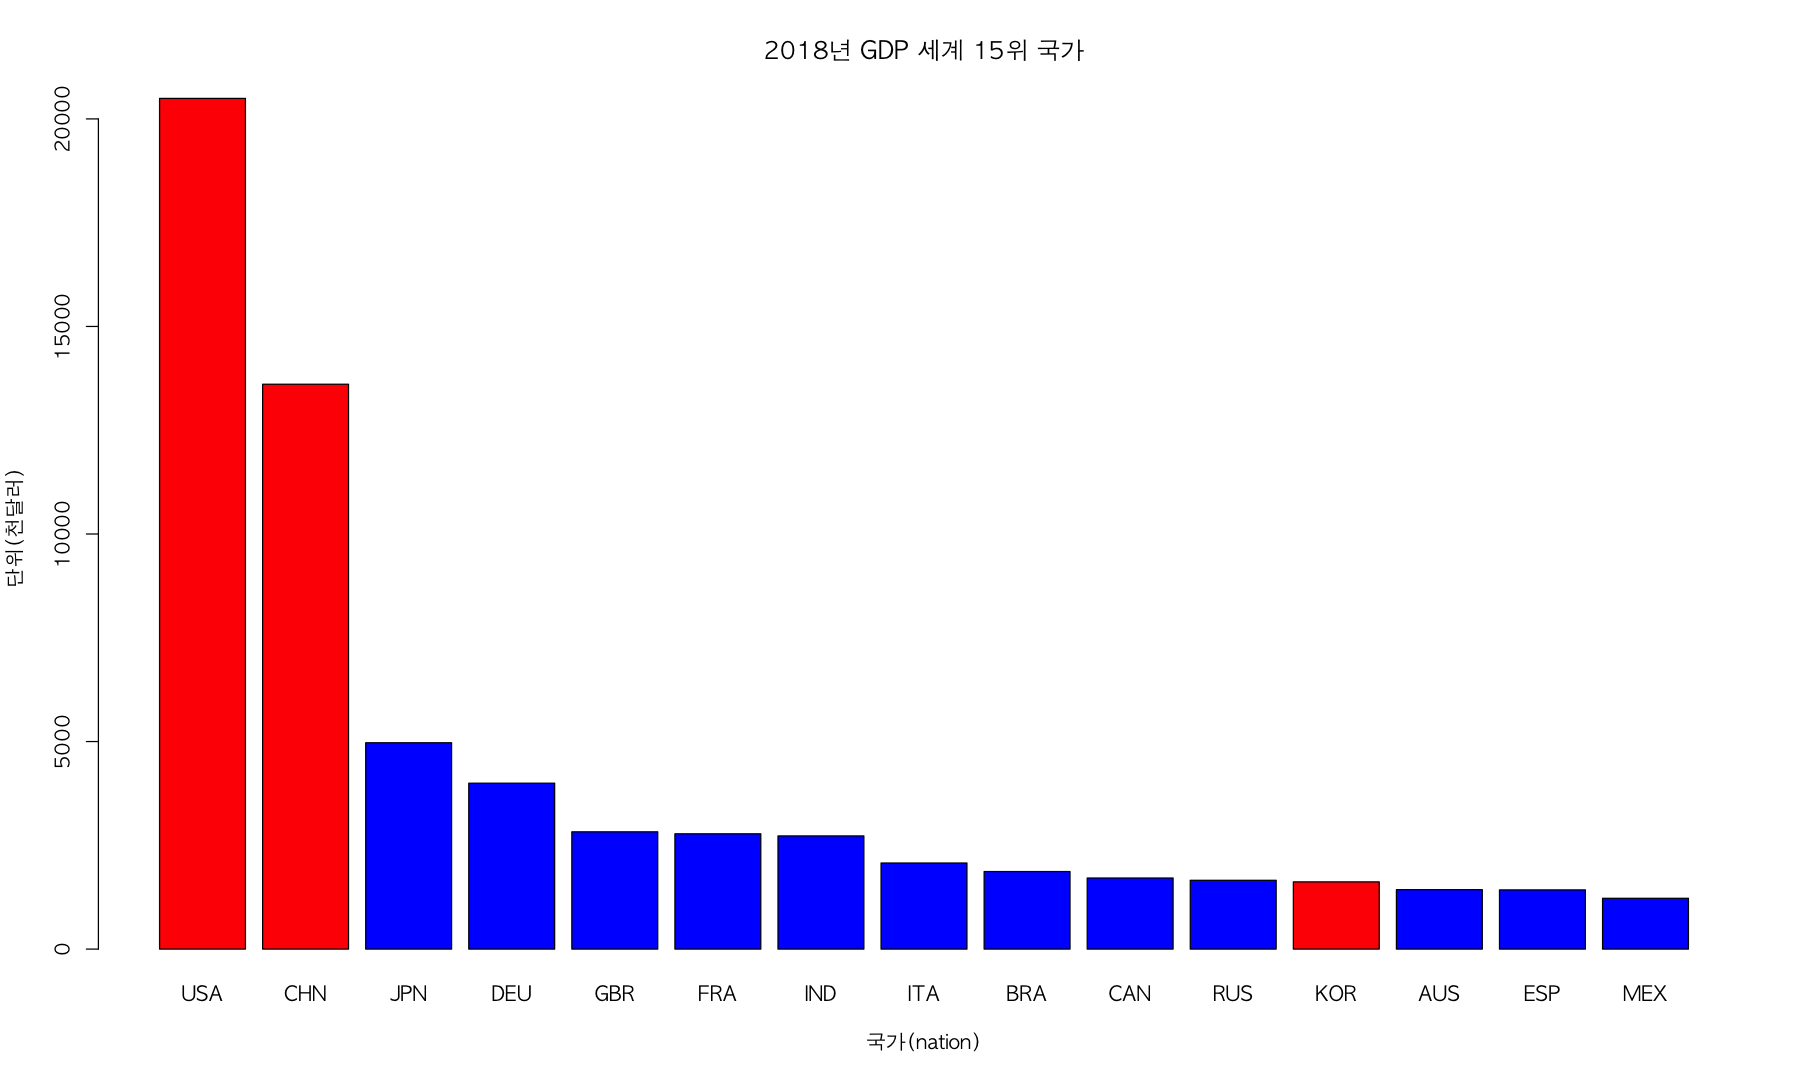

In [47]:
# 미국과 중국, 한국은 빨간색으로 나머지국가는 파란색으로 표현한다.

par(family = "AppleGothic", bg = 'white') #한글 나오게 하기 + 백그라운드 컬러 정하기
red_countries <- c("USA", "CHN", "KOR")

colors <- ifelse(GDP_ranking15$Code == red_countries, "red", "blue")

barplot(
    GDP_ranking15$GDP/ 1000,               #Data
    main = "2018년 GDP 세계 15위 국가", # main Title
    xlab = "국가(nation)", # x축 이름
    ylab = "단위(천달러)",    # y축 이름
    col = colors, #바 색칠하기
    name = GDP_ranking15$Code  #벡터의 이름 주기
    
)

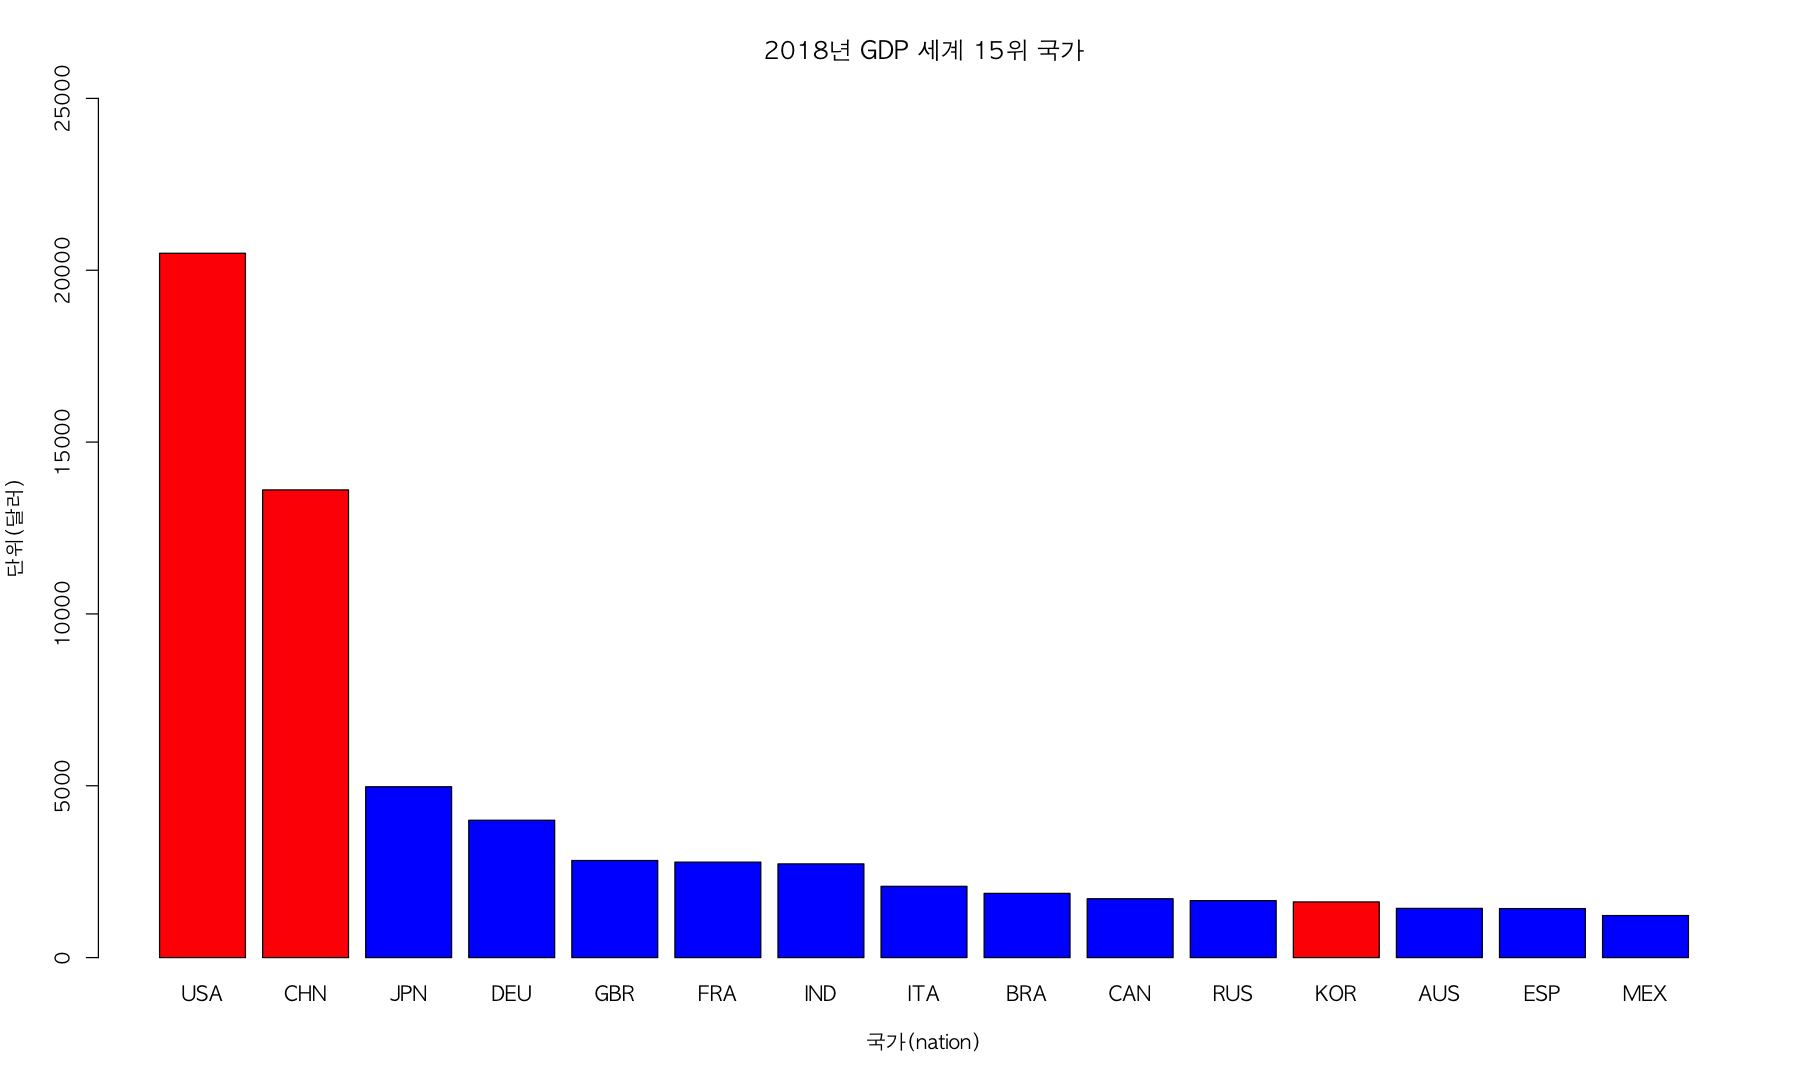

In [48]:
# 단위를 천단위로 표시하기

par(family = "AppleGothic", bg = 'white') #한글 나오게 하기 + 백그라운드 컬러 정하기
red_countries <- c("USA", "CHN", "KOR")

colors <- ifelse(GDP_ranking15$Code == red_countries, "red", "blue")

barplot(
    GDP_ranking15$GDP/1000,               #Data
    main = "2018년 GDP 세계 15위 국가", # main Title
    xlab = "국가(nation)", # x축 이름
    ylab = "단위(달러)",    # y축 이름
    col = colors, #바 색칠하기
    name = GDP_ranking15$Code,  #벡터의 이름 주기
    ylim = c(0, 25000)
)

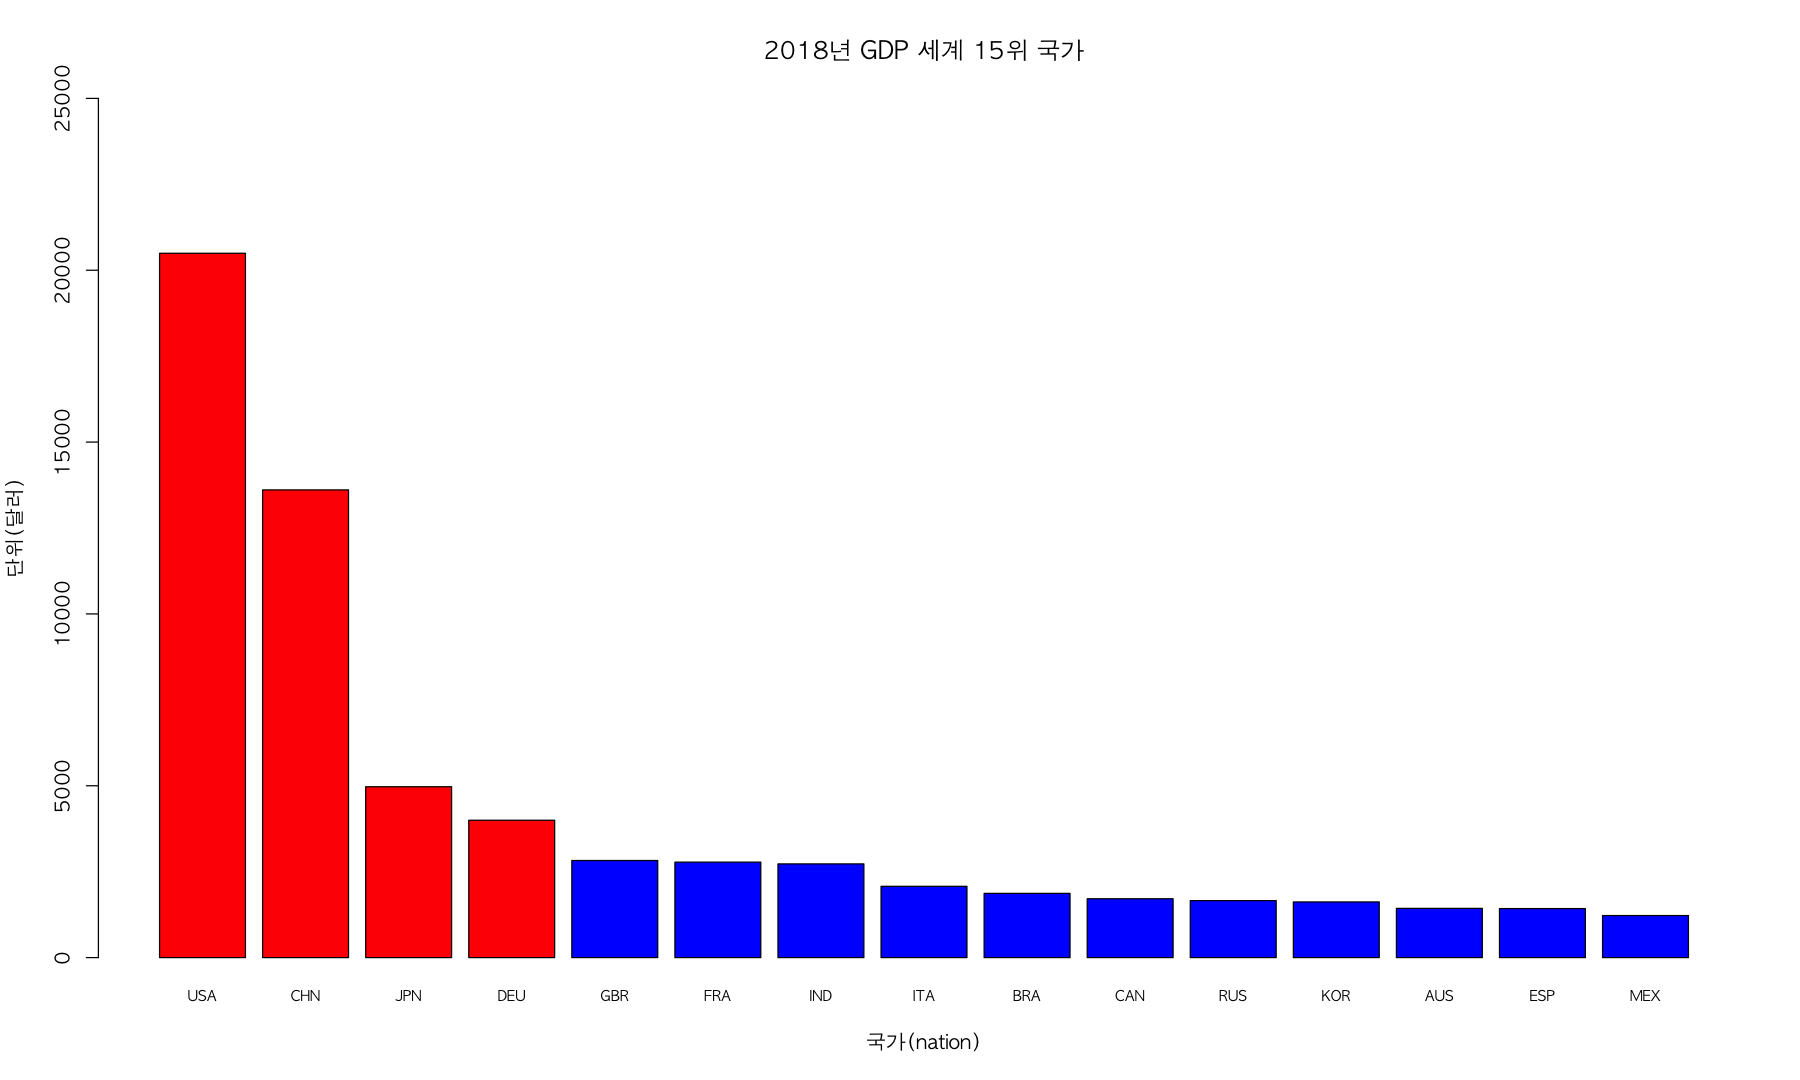

In [49]:
# GDP가 3000000이상인 국가만 빨간색으로 표시하기

par(family = "AppleGothic", bg = 'white') #한글 나오게 하기 + 백그라운드 컬러 정하기

colors <- ifelse(GDP_ranking15$GDP / 1000 <= 3000, "blue", "red")

barplot(
    GDP_ranking15$GDP/1000,               #Data
    main = "2018년 GDP 세계 15위 국가", # main Title
    xlab = "국가(nation)", # x축 이름
    ylab = "단위(달러)",    # y축 이름
    col = colors, #바 색칠하기
    name = GDP_ranking15$Code,  #벡터의 이름 주기
    ylim = c(0, 25000),
    cex.name = 0.7 # 폰트 크기
)

---
# 데이터 처리

In [50]:
# 데이터 정렬

install.packages("dplyr")

library(dplyr)


다운로드된 바이너리 패키지들은 다음의 위치에 있습니다
	/var/folders/ld/4g_s3hld1vj9nty14y00fb9r0000gn/T//RtmpgSupQ3/downloaded_packages


In [51]:
#Sepal.Length 기준으로 오름차순 정렬하기
head(iris)
head(arrange(iris, Sepal.Length))

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,4.3,3.0,1.1,0.1,setosa
2,4.4,2.9,1.4,0.2,setosa
3,4.4,3.0,1.3,0.2,setosa
4,4.4,3.2,1.3,0.2,setosa
5,4.5,2.3,1.3,0.3,setosa
6,4.6,3.1,1.5,0.2,setosa


# 정렬의 기준 

In [52]:
# Sepal.Length기준으로 오름차순 정렬후 1열과 2열만 보기

head(arrange(iris[1:2], Sepal.Length))

,Sepal.Length,Sepal.Width
,<dbl>,<dbl>
1,4.3,3.0
2,4.4,2.9
3,4.4,3.0
4,4.4,3.2
5,4.5,2.3
6,4.6,3.1


In [53]:
# Sepal.Length기준으로 정렬후 동일한 크기를 가진 데이터 발생시 Patal.Length기준으로 오름차순 정렬하기

head(arrange(iris, Sepal.Length, Petal.Length))

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,4.3,3.0,1.1,0.1,setosa
2,4.4,3.0,1.3,0.2,setosa
3,4.4,3.2,1.3,0.2,setosa
4,4.4,2.9,1.4,0.2,setosa
5,4.5,2.3,1.3,0.3,setosa
6,4.6,3.6,1.0,0.2,setosa


In [54]:
# Sepal.Length기준으로 내림차순 정렬

head(arrange(iris, desc(Sepal.Length, Patal.Length)))

ERROR: [1m[33mError[39m in `arrange()`:[22m
[1m[22m[33m![39m `desc()` must be called with exactly one argument.


In [ ]:
# Sampling(중복값을 허용하지 않음)
sample(1:45, 6)

[1] 11 31 13 12 39 22

In [ ]:
samp <- sample(1:nrow(iris), nrow(iris) * 0.7)

In [ ]:
irisTranin <- iris[samp,]
head(irisTranin)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
43,4.4,3.2,1.3,0.2,setosa
84,6.0,2.7,5.1,1.6,versicolor
39,4.4,3.0,1.3,0.2,setosa
7,4.6,3.4,1.4,0.3,setosa
20,5.1,3.8,1.5,0.3,setosa
15,5.8,4.0,1.2,0.2,setosa


In [ ]:
table(irisTranin$Species)


    setosa versicolor  virginica 
        39         30         36 

In [ ]:
samp <- c(sample(1:50, 35),
sample(51:100, 35),
sample(101:150, 35))
irisTranin <- iris[samp,]
head(irisTranin)
summary(irisTranin)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5,5.0,3.6,1.4,0.2,setosa
12,4.8,3.4,1.6,0.2,setosa
41,5.0,3.5,1.3,0.3,setosa
3,4.7,3.2,1.3,0.2,setosa
7,4.6,3.4,1.4,0.3,setosa
49,5.3,3.7,1.5,0.2,setosa


  Sepal.Length    Sepal.Width    Petal.Length    Petal.Width         Species  
 Min.   :4.400   Min.   :2.00   Min.   :1.000   Min.   :0.10   setosa    :35  
 1st Qu.:5.100   1st Qu.:2.80   1st Qu.:1.600   1st Qu.:0.30   versicolor:35  
 Median :5.800   Median :3.00   Median :4.200   Median :1.30   virginica :35  
 Mean   :5.836   Mean   :3.07   Mean   :3.757   Mean   :1.21                  
 3rd Qu.:6.400   3rd Qu.:3.30   3rd Qu.:5.100   3rd Qu.:1.80                  
 Max.   :7.900   Max.   :4.40   Max.   :6.900   Max.   :2.50                  

In [ ]:
irisTest <- iris[-samp,]
nrow(irisTest)

[1] 45

In [ ]:
summary(irisTest)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.400   Min.   :2.200   Min.   :1.300   Min.   :0.100  
 1st Qu.:5.000   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.400  
 Median :5.700   Median :3.000   Median :4.400   Median :1.300  
 Mean   :5.747   Mean   :3.033   Mean   :3.713   Mean   :1.216  
 3rd Qu.:6.300   3rd Qu.:3.300   3rd Qu.:5.000   3rd Qu.:1.800  
 Max.   :7.900   Max.   :3.900   Max.   :6.400   Max.   :2.500  
       Species  
 setosa    :15  
 versicolor:15  
 virginica :15  
                
                
                

In [ ]:
set.seed(1234) # 랜덤 샘플링에 알고리즘을 생성해줌
samp <- c(sample(1:50, 35),
          sample(51:100, 35),
          sample(101:150, 35))
irisTranin <- iris[samp,]
irisTest <- iris[-samp,]
head(irisTranin)
head(irisTest)
summary(irisTranin)
summary(irisTest)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
28,5.2,3.5,1.5,0.2,setosa
16,5.7,4.4,1.5,0.4,setosa
22,5.1,3.7,1.5,0.4,setosa
37,5.5,3.5,1.3,0.2,setosa
44,5.0,3.5,1.6,0.6,setosa
9,4.4,2.9,1.4,0.2,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
7,4.6,3.4,1.4,0.3,setosa
10,4.9,3.1,1.5,0.1,setosa
11,5.4,3.7,1.5,0.2,setosa
13,4.8,3.0,1.4,0.1,setosa
17,5.4,3.9,1.3,0.4,setosa


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width         Species  
 Min.   :4.300   Min.   :2.200   Min.   :1.100   Min.   :0.10   setosa    :35  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.30   versicolor:35  
 Median :5.800   Median :3.000   Median :4.300   Median :1.30   virginica :35  
 Mean   :5.847   Mean   :3.042   Mean   :3.749   Mean   :1.19                  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.80                  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.50                  

  Sepal.Length    Sepal.Width     Petal.Length   Petal.Width          Species  
 Min.   :4.400   Min.   :2.000   Min.   :1.00   Min.   :0.100   setosa    :15  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.60   1st Qu.:0.300   versicolor:15  
 Median :5.800   Median :3.100   Median :4.70   Median :1.400   virginica :15  
 Mean   :5.836   Mean   :3.093   Mean   :3.78   Mean   :1.222                  
 3rd Qu.:6.500   3rd Qu.:3.400   3rd Qu.:5.10   3rd Qu.:1.900                  
 Max.   :7.700   Max.   :4.100   Max.   :6.70   Max.   :2.500                  

In [ ]:
# 모집단에서 필요한 데이터만 추출하기
# iris에서 Species가 Setosa인것만 추출하여 iris_setosa라는 데이터프레임 만들기

iris_setosa <- subset(iris, Species == 'setosa')
iris_setosa

str(iris_setosa)




,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [ ]:
# factor 조정

iris_setosa$Species <- factor(iris_setosa$Species)
str(iris_setosa)

'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 1 level "setosa": 1 1 1 1 1 1 1 1 1 1 ...


In [ ]:
# iris에서 Species가 versicolor 인것만 추출하여 iris_versicolor라는 데이터프레임 만들기

iris_versicolor <- subset(iris, Species == 'versicolor')
rownames(iris_versicolor) <- c() # rownames 초기화
head(iris_versicolor)

str(iris_versicolor)

iris_versicolor$Species <- factor(iris_versicolor$Species)
str(iris_versicolor)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,7.0,3.2,4.7,1.4,versicolor
2,6.4,3.2,4.5,1.5,versicolor
3,6.9,3.1,4.9,1.5,versicolor
4,5.5,2.3,4.0,1.3,versicolor
5,6.5,2.8,4.6,1.5,versicolor
6,5.7,2.8,4.5,1.3,versicolor


'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  7 6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 ...
 $ Sepal.Width : num  3.2 3.2 3.1 2.3 2.8 2.8 3.3 2.4 2.9 2.7 ...
 $ Petal.Length: num  4.7 4.5 4.9 4 4.6 4.5 4.7 3.3 4.6 3.9 ...
 $ Petal.Width : num  1.4 1.5 1.5 1.3 1.5 1.3 1.6 1 1.3 1.4 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 2 2 2 2 2 2 2 2 2 2 ...
'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  7 6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 ...
 $ Sepal.Width : num  3.2 3.2 3.1 2.3 2.8 2.8 3.3 2.4 2.9 2.7 ...
 $ Petal.Length: num  4.7 4.5 4.9 4 4.6 4.5 4.7 3.3 4.6 3.9 ...
 $ Petal.Width : num  1.4 1.5 1.5 1.3 1.5 1.3 1.6 1 1.3 1.4 ...
 $ Species     : Factor w/ 1 level "versicolor": 1 1 1 1 1 1 1 1 1 1 ...


In [ ]:
# iris에서 species가 setosa이고 Sepal.Length가 5보다 큰 자료만 추출하기

iris_setosa <- subset(iris, Species == 'setosa' & iris$Sepal.Length >=5)
iris_setosa$Species <- factor(iris_setosa$Species)

rownames(iris_setosa) <- c()
str(iris_setosa)
summary(iris_setosa)
iris_setosa


'data.frame':	30 obs. of  5 variables:
 $ Sepal.Length: num  5.1 5 5.4 5 5.4 5.8 5.7 5.4 5.1 5.7 ...
 $ Sepal.Width : num  3.5 3.6 3.9 3.4 3.7 4 4.4 3.9 3.5 3.8 ...
 $ Petal.Length: num  1.4 1.4 1.7 1.5 1.5 1.2 1.5 1.3 1.4 1.7 ...
 $ Petal.Width : num  0.2 0.2 0.4 0.2 0.2 0.2 0.4 0.4 0.3 0.3 ...
 $ Species     : Factor w/ 1 level "setosa": 1 1 1 1 1 1 1 1 1 1 ...


  Sepal.Length    Sepal.Width    Petal.Length    Petal.Width     Species  
 Min.   :5.000   Min.   :3.00   Min.   :1.200   Min.   :0.10   setosa:30  
 1st Qu.:5.025   1st Qu.:3.40   1st Qu.:1.400   1st Qu.:0.20              
 Median :5.100   Median :3.50   Median :1.500   Median :0.20              
 Mean   :5.230   Mean   :3.62   Mean   :1.493   Mean   :0.28              
 3rd Qu.:5.400   3rd Qu.:3.80   3rd Qu.:1.600   3rd Qu.:0.40              
 Max.   :5.800   Max.   :4.40   Max.   :1.900   Max.   :0.60              

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
5.0,3.4,1.5,0.2,setosa
5.4,3.7,1.5,0.2,setosa
5.8,4.0,1.2,0.2,setosa
5.7,4.4,1.5,0.4,setosa
5.4,3.9,1.3,0.4,setosa
5.1,3.5,1.4,0.3,setosa


In [ ]:
# subset으로 컬럼 지우기

subset(iris, select = -Species)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4
7,4.6,3.4,1.4,0.3
8,5.0,3.4,1.5,0.2
9,4.4,2.9,1.4,0.2


# 그룹연산 함수

In [ ]:
# iris에서 Species별로 Sepal.Width의 평균을 구하시오

mean(subset(iris, Species == 'setosa')$Sepal.Width)
mean(subset(iris, Species == 'versicolor')$Sepal.Width)
mean(subset(iris, Species == 'virginica')$Sepal.Width)
str(iris)




[1] 3.428

[1] 2.77

[1] 2.974

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [ ]:
aggregate(Sepal.Width ~ Species, iris, mean) # 그룹연산 함수

Species,Sepal.Width
<fct>,<dbl>
setosa,3.428
versicolor,2.770
virginica,2.974


# 데이터 이상 체크 하기

In [ ]:
seoul <- read.csv("./Data/newSeoul2019.csv")
head(seoul)

,년도,월,자치구명,발생건수,사망자수,부상자수
,<int>,<int>,<chr>,<int>,<int>,<int>
1,2011,1,종로구,115,2,165
2,2011,2,종로구,99,0,134
3,2011,3,종로구,116,0,162
4,2011,4,종로구,110,1,153
5,2011,5,종로구,122,0,157
6,2011,6,종로구,116,3,163


In [ ]:
str(seoul)

'data.frame':	2700 obs. of  6 variables:
 $ 년도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: chr  "종로구" "종로구" "종로구" "종로구" ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...


In [ ]:
# NA 확인

table(is.na(seoul))


FALSE 
16200 

In [55]:
# 컬럼별 NA 확인
for(i in 1:ncol(seoul)){
    cat("컬럼명 :", colnames(seoul[i]), "\t", sum(is.na(seoul[,i])),"\n")
}
sum(is.na(seoul$`년도`))

컬럼명 : 년도 	 0 
컬럼명 : 월 	 0 
컬럼명 : 자치구명 	 0 
컬럼명 : 발생건수 	 0 
컬럼명 : 사망자수 	 0 
컬럼명 : 부상자수 	 0 


[1] 0

In [ ]:
colSums(is.na(seoul)) #컬럼별 NA 갯수 구하기


년도       월 자치구명 발생건수 사망자수 부상자수 
       0        0        0        0        0        0

# 컬럼별 데이터 확인

In [ ]:
# 년도
table(seoul$`년도`)



2011 2012 2013 2014 2015 2016 2017 2018 2019 
 300  300  300  300  300  300  300  300  300 

In [ ]:
# 월
table(seoul$`월`)


  1   2   3   4   5   6   7   8   9  10  11  12 
225 225 225 225 225 225 225 225 225 225 225 225 

In [ ]:
# 자치구
table(seoul$`자치구명`)
unique(seoul$`자치구명`)
length(unique(seoul$`자치구명`))

ERROR: Error in eval(expr, envir, enclos): 객체 'seoul'를 찾을 수 없습니다


In [ ]:
# 자치구별 발생건수의 평균

aggregate(seoul$`발생건수` ~ seoul$`자치구명`, seoul, mean)

seoul$자치구명,seoul$발생건수
<chr>,<dbl>
강남구,306.36111
강동구,118.53704
강북구,101.78704
강서구,145.47222
관악구,128.38889
광진구,103.07407
구로구,126.09259
금천구,78.69444
노원구,129.21296


In [61]:
# 자치구별 발생건수의 평균
regionAcc.mean <- aggregate(`발생건수` ~ `자치구명`, seoul, mean)

In [62]:
# 발생건수 기준으로 내림차순 정렬하기
arrange(regionAcc.mean[ , ], desc(발생건수))

자치구명,발생건수
<chr>,<dbl>
강남구,306.36111
송파구,224.75926
영등포구,194.64815
서초구,186.48148
동대문구,153.64815
강서구,145.47222
마포구,141.51852
중랑구,138.46296
성북구,130.85185


In [63]:
# 자치구별 표준편차



[1] NA

In [67]:
regionAcc.sd <- aggregate(`발생건수` ~ `자치구명`, seoul, sd)

regionAcc.sd

ERROR: Error in sd/mean: 이항연산자에 수치가 아닌 인수입니다


In [ ]:
# 자치구별의 발생건수의 뱐동 계수
# 변동계수 = 표준편차 / 평균

